Dependencies

In [ ]:
!pip install tensorflow matplotlib tensorflow-datasets ipywidgets

In [ ]:
!pip list

Limit GPU consumption

In [22]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [23]:
for gpu in gpus:
  print(gpu)

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


Tesorflow dataset

In [24]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [25]:
ds = tfds.load('fashion_mnist',split="train")

In [26]:
ds.as_numpy_iterator().next()['label']

np.int64(2)

Visualize Data & Build Data

In [27]:
import numpy as np

In [28]:
dataiterator = ds.as_numpy_iterator()

Subplot formatting and get 4 images in a batch

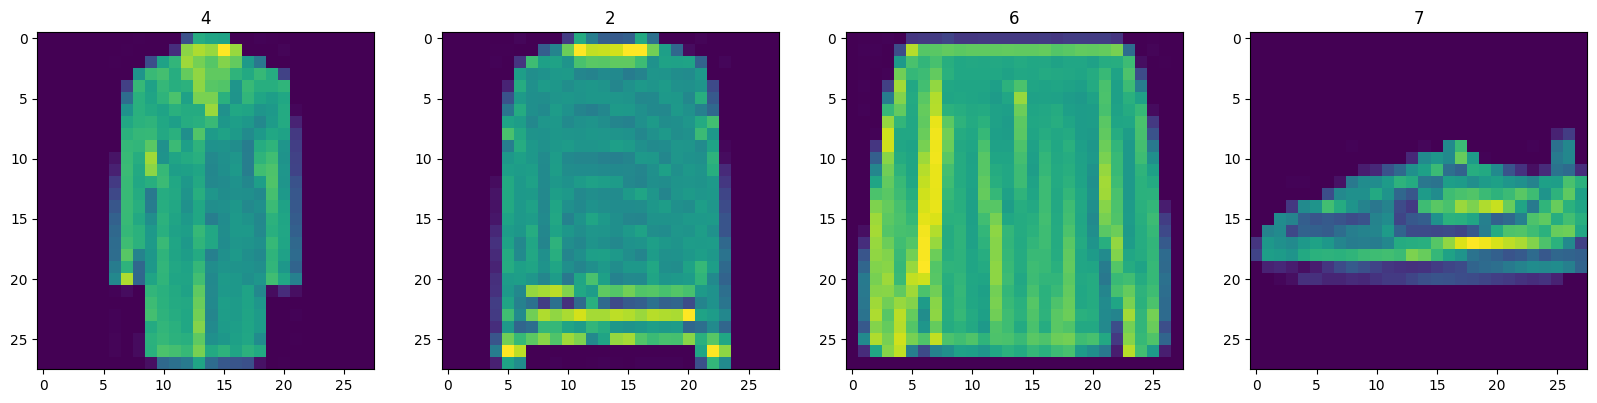

In [34]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx in range(4):
  batch = dataiterator.next()
  ax[idx].imshow(np.squeeze(batch['image']))
  ax[idx].title.set_text(batch['label'])

Scale and return Images

In [36]:
def scale_images(data):
  image = data['image']
  return image / 255

In [37]:
# Reload the dataset
ds = tfds.load('fashion_mnist',split="train")
# scale images
ds = ds.map(scale_images)
# Cache the dataset
ds = ds.cache()
# Shuffle the dataset
ds = ds.shuffle(60000)
# Batch into 128 images per sample
ds = ds.batch(128)
# Reduces likelihood of bottlenecking
ds = ds.prefetch(64)

In [40]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)